In [1]:
%%capture
!pip install xarray[complete]

In [2]:
# @title Import Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import joblib

import xarray as xr

# Checking Missing Values for Downloaded Data

In [3]:
# @title Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [43]:
# @title Load Downloaded Data
def load_data(data_path,lead_time):
  df = pd.read_pickle(f'{data_path}aiwp_ml_setup_500geopotential_32x64_2020_leadtime{lead_time}.pkl')
  df = df.rename(columns={col: col + "_" + str(lead_time) for col in df.columns if col not in ["time", "longitude", "latitude"]})
  return df


In [44]:
# @title Checking for 48 hours lead time.
data_path="/content/drive/MyDrive/MastersProject/Data/"
df_48 = load_data(data_path, 48)
df_48.isna().sum()

,0
time,0
longitude,0
latitude,0
graphcast_48,0
pangu_48,0
neuralgcm_48,0
keisler_48,32768
ifshres_48,0
area_weight_48,0


In [39]:
# @title Plot Missing values over time
def plot_missing_values_over_time(model, df, lead_time):
  df.groupby("time")[f"{model}_{lead_time}"].apply(lambda x: x.isna().sum()).plot()
  plt.title(f"Missing Values Over Time {model} 2020 {lead_time} hr Forecasts.")
  plt.xlabel("Time")
  plt.ylabel("Missing values")
  plt.show()

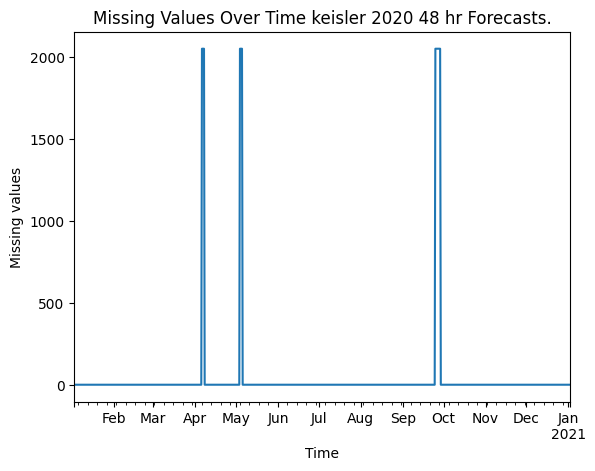

In [42]:
plot_missing_values_over_time('keisler',df_48, 48)

In [46]:
df_48[df_48["keisler_48"].isna()]["time"].unique()

<DatetimeArray>
['2020-04-06 00:00:00', '2020-04-06 12:00:00', '2020-04-07 00:00:00',
 '2020-04-07 12:00:00', '2020-05-04 00:00:00', '2020-05-04 12:00:00',
 '2020-05-05 00:00:00', '2020-05-05 12:00:00', '2020-09-25 00:00:00',
 '2020-09-25 12:00:00', '2020-09-26 00:00:00', '2020-09-26 12:00:00',
 '2020-09-27 00:00:00', '2020-09-27 12:00:00', '2020-09-28 00:00:00',
 '2020-09-28 12:00:00']
Length: 16, dtype: datetime64[ns]


Lead Time : 72

Count of Missing Values
 time                  0
longitude             0
latitude              0
graphcast_72          0
pangu_72              0
neuralgcm_72          0
keisler_72        32768
ifshres_72            0
area_weight_72        0
dtype: int64


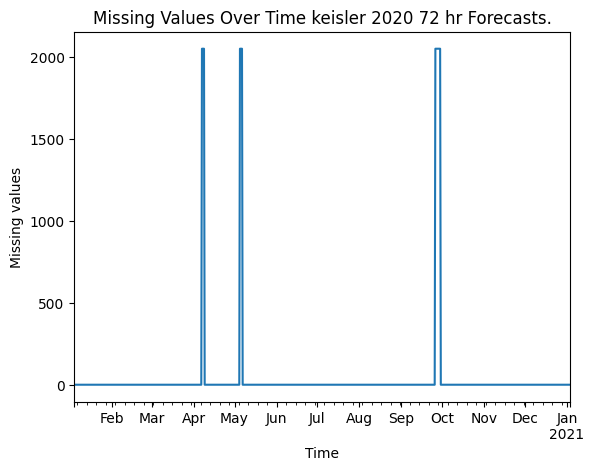

Affected Time Steps
 <DatetimeArray>
['2020-04-07 00:00:00', '2020-04-07 12:00:00', '2020-04-08 00:00:00',
 '2020-04-08 12:00:00', '2020-05-05 00:00:00', '2020-05-05 12:00:00',
 '2020-05-06 00:00:00', '2020-05-06 12:00:00', '2020-09-26 00:00:00',
 '2020-09-26 12:00:00', '2020-09-27 00:00:00', '2020-09-27 12:00:00',
 '2020-09-28 00:00:00', '2020-09-28 12:00:00', '2020-09-29 00:00:00',
 '2020-09-29 12:00:00']
Length: 16, dtype: datetime64[ns]

Lead Time : 96

Count of Missing Values
 time                  0
longitude             0
latitude              0
graphcast_96          0
pangu_96              0
neuralgcm_96          0
keisler_96        32768
ifshres_96            0
area_weight_96        0
dtype: int64


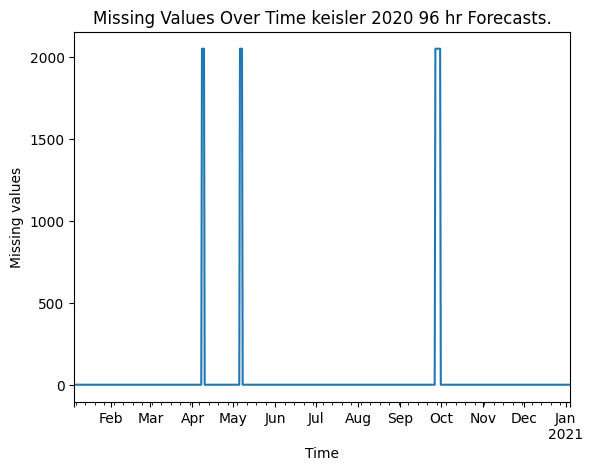

Affected Time Steps
 <DatetimeArray>
['2020-04-08 00:00:00', '2020-04-08 12:00:00', '2020-04-09 00:00:00',
 '2020-04-09 12:00:00', '2020-05-06 00:00:00', '2020-05-06 12:00:00',
 '2020-05-07 00:00:00', '2020-05-07 12:00:00', '2020-09-27 00:00:00',
 '2020-09-27 12:00:00', '2020-09-28 00:00:00', '2020-09-28 12:00:00',
 '2020-09-29 00:00:00', '2020-09-29 12:00:00', '2020-09-30 00:00:00',
 '2020-09-30 12:00:00']
Length: 16, dtype: datetime64[ns]

Lead Time : 120

Count of Missing Values
 time                   0
longitude              0
latitude               0
graphcast_120          0
pangu_120              0
neuralgcm_120          0
keisler_120        32768
ifshres_120            0
area_weight_120        0
dtype: int64


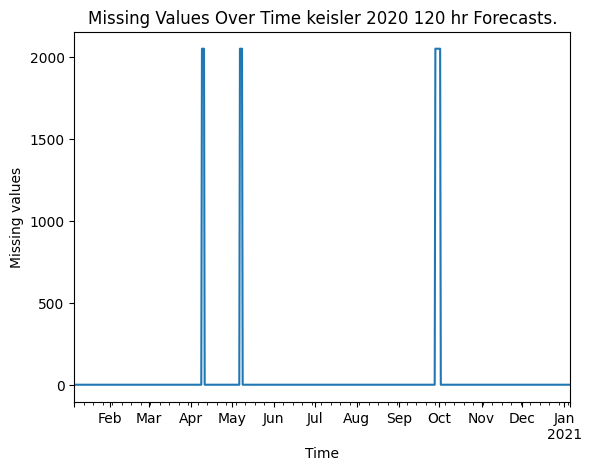

Affected Time Steps
 <DatetimeArray>
['2020-04-09 00:00:00', '2020-04-09 12:00:00', '2020-04-10 00:00:00',
 '2020-04-10 12:00:00', '2020-05-07 00:00:00', '2020-05-07 12:00:00',
 '2020-05-08 00:00:00', '2020-05-08 12:00:00', '2020-09-28 00:00:00',
 '2020-09-28 12:00:00', '2020-09-29 00:00:00', '2020-09-29 12:00:00',
 '2020-09-30 00:00:00', '2020-09-30 12:00:00', '2020-10-01 00:00:00',
 '2020-10-01 12:00:00']
Length: 16, dtype: datetime64[ns]

Lead Time : 144

Count of Missing Values
 time                   0
longitude              0
latitude               0
graphcast_144          0
pangu_144              0
neuralgcm_144          0
keisler_144        32768
ifshres_144            0
area_weight_144        0
dtype: int64


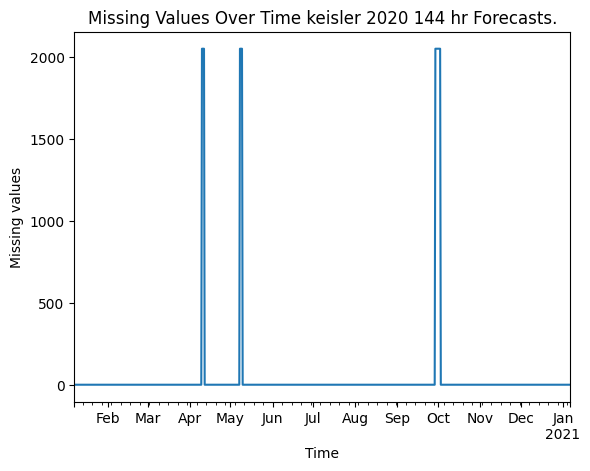

Affected Time Steps
 <DatetimeArray>
['2020-04-10 00:00:00', '2020-04-10 12:00:00', '2020-04-11 00:00:00',
 '2020-04-11 12:00:00', '2020-05-08 00:00:00', '2020-05-08 12:00:00',
 '2020-05-09 00:00:00', '2020-05-09 12:00:00', '2020-09-29 00:00:00',
 '2020-09-29 12:00:00', '2020-09-30 00:00:00', '2020-09-30 12:00:00',
 '2020-10-01 00:00:00', '2020-10-01 12:00:00', '2020-10-02 00:00:00',
 '2020-10-02 12:00:00']
Length: 16, dtype: datetime64[ns]

Lead Time : 168

Count of Missing Values
 time                   0
longitude              0
latitude               0
graphcast_168          0
pangu_168              0
neuralgcm_168          0
keisler_168        32768
ifshres_168            0
area_weight_168        0
dtype: int64


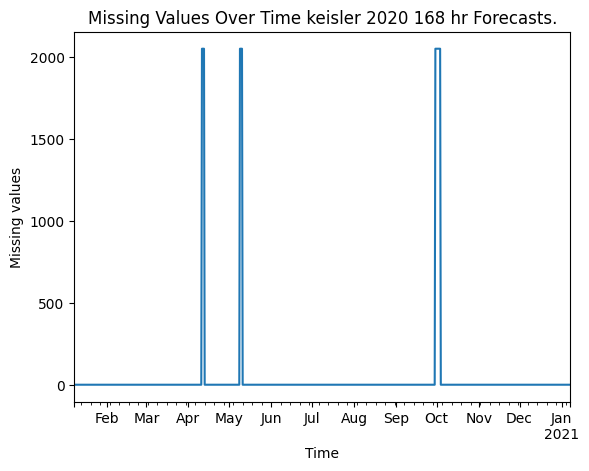

Affected Time Steps
 <DatetimeArray>
['2020-04-11 00:00:00', '2020-04-11 12:00:00', '2020-04-12 00:00:00',
 '2020-04-12 12:00:00', '2020-05-09 00:00:00', '2020-05-09 12:00:00',
 '2020-05-10 00:00:00', '2020-05-10 12:00:00', '2020-09-30 00:00:00',
 '2020-09-30 12:00:00', '2020-10-01 00:00:00', '2020-10-01 12:00:00',
 '2020-10-02 00:00:00', '2020-10-02 12:00:00', '2020-10-03 00:00:00',
 '2020-10-03 12:00:00']
Length: 16, dtype: datetime64[ns]

Lead Time : 192

Count of Missing Values
 time                   0
longitude              0
latitude               0
graphcast_192          0
pangu_192              0
neuralgcm_192          0
keisler_192        32768
ifshres_192            0
area_weight_192        0
dtype: int64


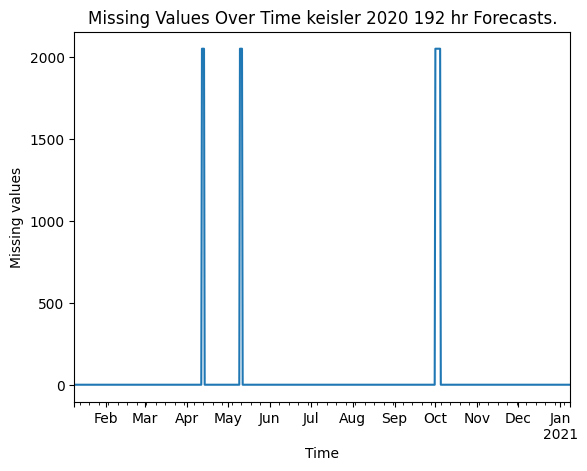

Affected Time Steps
 <DatetimeArray>
['2020-04-12 00:00:00', '2020-04-12 12:00:00', '2020-04-13 00:00:00',
 '2020-04-13 12:00:00', '2020-05-10 00:00:00', '2020-05-10 12:00:00',
 '2020-05-11 00:00:00', '2020-05-11 12:00:00', '2020-10-01 00:00:00',
 '2020-10-01 12:00:00', '2020-10-02 00:00:00', '2020-10-02 12:00:00',
 '2020-10-03 00:00:00', '2020-10-03 12:00:00', '2020-10-04 00:00:00',
 '2020-10-04 12:00:00']
Length: 16, dtype: datetime64[ns]

Lead Time : 216

Count of Missing Values
 time                   0
longitude              0
latitude               0
graphcast_216          0
pangu_216              0
neuralgcm_216          0
keisler_216        32768
ifshres_216            0
area_weight_216        0
dtype: int64


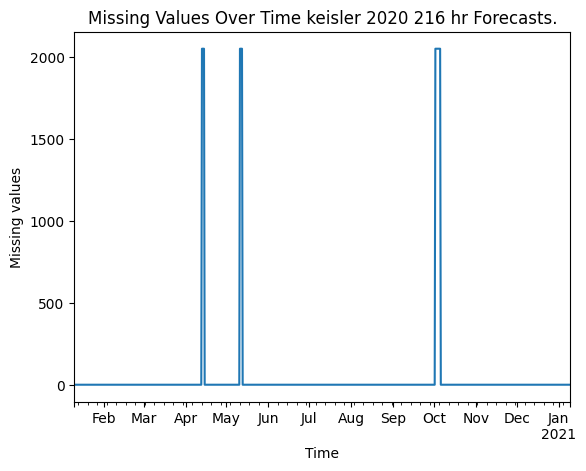

Affected Time Steps
 <DatetimeArray>
['2020-04-13 00:00:00', '2020-04-13 12:00:00', '2020-04-14 00:00:00',
 '2020-04-14 12:00:00', '2020-05-11 00:00:00', '2020-05-11 12:00:00',
 '2020-05-12 00:00:00', '2020-05-12 12:00:00', '2020-10-02 00:00:00',
 '2020-10-02 12:00:00', '2020-10-03 00:00:00', '2020-10-03 12:00:00',
 '2020-10-04 00:00:00', '2020-10-04 12:00:00', '2020-10-05 00:00:00',
 '2020-10-05 12:00:00']
Length: 16, dtype: datetime64[ns]

Lead Time : 240

Count of Missing Values
 time                   0
longitude              0
latitude               0
graphcast_240          0
pangu_240              0
neuralgcm_240          0
keisler_240        32768
ifshres_240            0
area_weight_240        0
dtype: int64


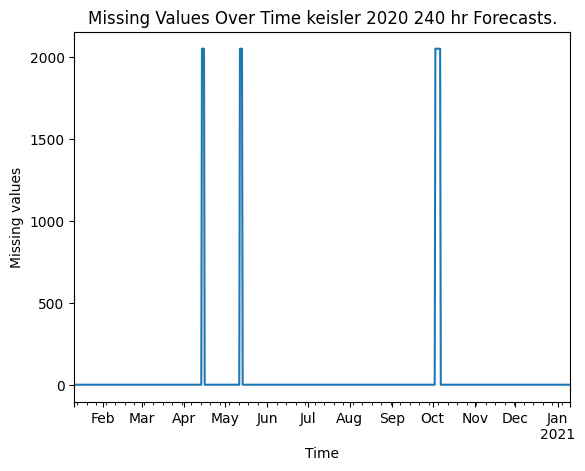

Affected Time Steps
 <DatetimeArray>
['2020-04-14 00:00:00', '2020-04-14 12:00:00', '2020-04-15 00:00:00',
 '2020-04-15 12:00:00', '2020-05-12 00:00:00', '2020-05-12 12:00:00',
 '2020-05-13 00:00:00', '2020-05-13 12:00:00', '2020-10-03 00:00:00',
 '2020-10-03 12:00:00', '2020-10-04 00:00:00', '2020-10-04 12:00:00',
 '2020-10-05 00:00:00', '2020-10-05 12:00:00', '2020-10-06 00:00:00',
 '2020-10-06 12:00:00']
Length: 16, dtype: datetime64[ns]


In [56]:
# @title Check other Leadtimes
lead_times=[72, 96, 120, 144, 168, 192, 216, 240]

for lead_time in lead_times:
  print(f"\nLead Time : {lead_time}\n")
  df = load_data(data_path, lead_time)
  print("Count of Missing Values\n",df.isna().sum())
  plot_missing_values_over_time('keisler',df, lead_time)
  print("Affected Time Steps\n",df[df[f"keisler_{lead_time}"].isna()]["time"].unique())






# Checking Missing Values for WeatherBench2 data

In [4]:
# @title Authentication for GCloud Bucket
from google.colab import auth
auth.authenticate_user()

In [36]:
# @title Load Forecasts
def load_forecasts_per_lead_time(model, data_store, level, lead_time, variable):
  # Load forecasts in zarr format
  sliced =  (
                xr.open_zarr(data_store)[variable]
                .sel(
                    level=level,
                    prediction_timedelta=np.timedelta64(lead_time, 'h')
                    # ,time=slice('2020-01-01T00:00:00','2020-12-31T12:00:00')
                )
            )
  # print(sliced)

  # convert sliced dataset to a pandas dataframe
  df = sliced.to_dataframe()[[variable]]
  df.columns = [f'{model}_{lead_time}']
  df.reset_index(inplace=True)
  df['area_weight'] = np.cos(np.deg2rad(df['latitude']))

  return df

In [37]:
# @title Forecasts for 48 hr Lead time
keisler_data_store= "gs://weatherbench2/datasets/keisler/2020-64x32_equiangular_conservative.zarr"
keisler_48 = load_forecasts_per_lead_time('keisler',keisler_data_store, 500,48, "geopotential")
keisler_48

<ipython-input-36-93dc770bee38>:5: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(data_store)[variable]


,time,longitude,latitude,keisler_48,area_weight
0,2020-01-01 00:00:00,0.000,-87.1875,49930.972656,0.049068
1,2020-01-01 00:00:00,0.000,-81.5625,50047.832031,0.146730
2,2020-01-01 00:00:00,0.000,-75.9375,50137.500000,0.242980
3,2020-01-01 00:00:00,0.000,-70.3125,49860.648438,0.336890
4,2020-01-01 00:00:00,0.000,-64.6875,49146.250000,0.427555
...,...,...,...,...,...
1499131,2020-12-31 12:00:00,354.375,64.6875,53729.699219,0.427555
1499132,2020-12-31 12:00:00,354.375,70.3125,53431.546875,0.336890
1499133,2020-12-31 12:00:00,354.375,75.9375,52844.187500,0.242980
1499134,2020-12-31 12:00:00,354.375,81.5625,51903.535156,0.146730


In [28]:
print(keisler_48['time'].min())
print(keisler_48['time'].max())

2020-01-01 00:00:00
2020-12-31 12:00:00


In [29]:
keisler_48.isna().sum()

,0
time,0
longitude,0
latitude,0
keisler_48,32768
area_weight,0


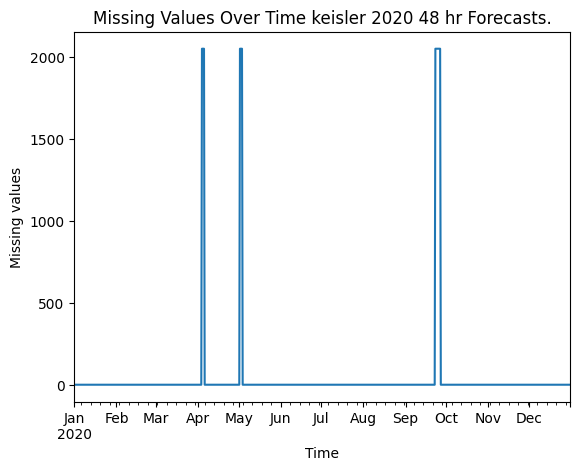

In [32]:
plot_missing_values_over_time('keisler', keisler_48, 48)


In [33]:
# @title ## Missing time steps
keisler_48[keisler_48['keisler_48'].isna()]

,time,longitude,latitude,keisler_48,area_weight
385024,2020-04-04 00:00:00,0.000,-87.1875,NaN,0.049068
385025,2020-04-04 00:00:00,0.000,-81.5625,NaN,0.146730
385026,2020-04-04 00:00:00,0.000,-75.9375,NaN,0.242980
385027,2020-04-04 00:00:00,0.000,-70.3125,NaN,0.336890
385028,2020-04-04 00:00:00,0.000,-64.6875,NaN,0.427555
...,...,...,...,...,...
1105915,2020-09-26 12:00:00,354.375,64.6875,NaN,0.427555
1105916,2020-09-26 12:00:00,354.375,70.3125,NaN,0.336890
1105917,2020-09-26 12:00:00,354.375,75.9375,NaN,0.242980
1105918,2020-09-26 12:00:00,354.375,81.5625,NaN,0.146730


In [35]:
missing_times = keisler_48[keisler_48["keisler_48"].isna()]["time"].unique()
print(missing_times)


<DatetimeArray>
['2020-04-04 00:00:00', '2020-04-04 12:00:00', '2020-04-05 00:00:00',
 '2020-04-05 12:00:00', '2020-05-02 00:00:00', '2020-05-02 12:00:00',
 '2020-05-03 00:00:00', '2020-05-03 12:00:00', '2020-09-23 00:00:00',
 '2020-09-23 12:00:00', '2020-09-24 00:00:00', '2020-09-24 12:00:00',
 '2020-09-25 00:00:00', '2020-09-25 12:00:00', '2020-09-26 00:00:00',
 '2020-09-26 12:00:00']
Length: 16, dtype: datetime64[ns]


Lead time: 72


<ipython-input-36-93dc770bee38>:5: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(data_store)[variable]


Count of Missing Values
 time               0
longitude          0
latitude           0
keisler_72     32768
area_weight        0
dtype: int64


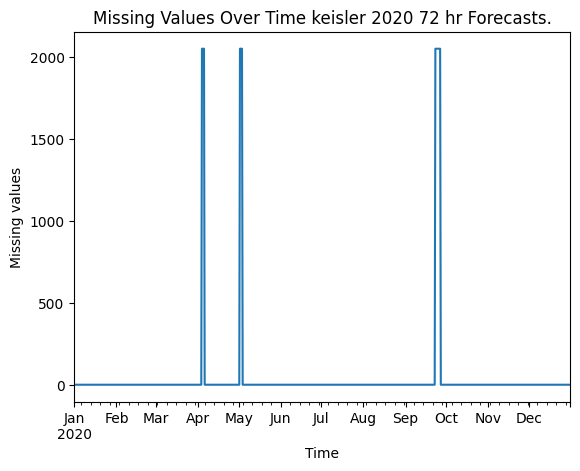

Affected Time Steps
 <DatetimeArray>
['2020-04-04 00:00:00', '2020-04-04 12:00:00', '2020-04-05 00:00:00',
 '2020-04-05 12:00:00', '2020-05-02 00:00:00', '2020-05-02 12:00:00',
 '2020-05-03 00:00:00', '2020-05-03 12:00:00', '2020-09-23 00:00:00',
 '2020-09-23 12:00:00', '2020-09-24 00:00:00', '2020-09-24 12:00:00',
 '2020-09-25 00:00:00', '2020-09-25 12:00:00', '2020-09-26 00:00:00',
 '2020-09-26 12:00:00']
Length: 16, dtype: datetime64[ns]
Lead time: 96


<ipython-input-36-93dc770bee38>:5: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(data_store)[variable]


Count of Missing Values
 time               0
longitude          0
latitude           0
keisler_96     32768
area_weight        0
dtype: int64


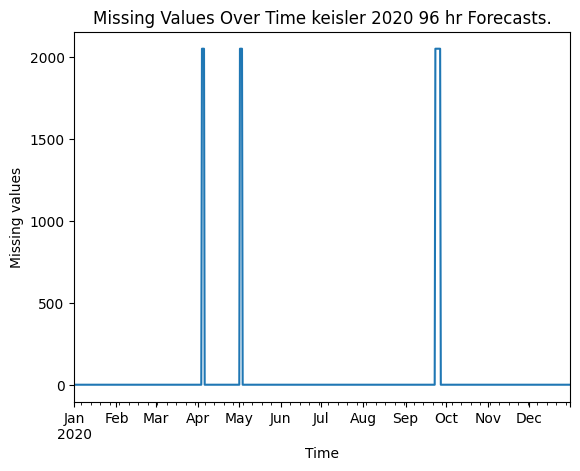

Affected Time Steps
 <DatetimeArray>
['2020-04-04 00:00:00', '2020-04-04 12:00:00', '2020-04-05 00:00:00',
 '2020-04-05 12:00:00', '2020-05-02 00:00:00', '2020-05-02 12:00:00',
 '2020-05-03 00:00:00', '2020-05-03 12:00:00', '2020-09-23 00:00:00',
 '2020-09-23 12:00:00', '2020-09-24 00:00:00', '2020-09-24 12:00:00',
 '2020-09-25 00:00:00', '2020-09-25 12:00:00', '2020-09-26 00:00:00',
 '2020-09-26 12:00:00']
Length: 16, dtype: datetime64[ns]
Lead time: 120


<ipython-input-36-93dc770bee38>:5: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(data_store)[variable]


Count of Missing Values
 time               0
longitude          0
latitude           0
keisler_120    32768
area_weight        0
dtype: int64


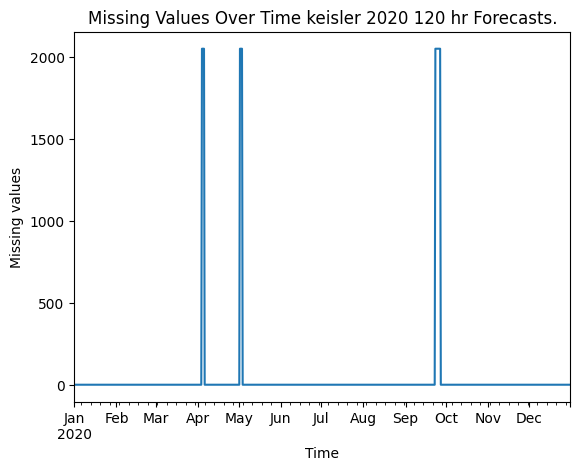

Affected Time Steps
 <DatetimeArray>
['2020-04-04 00:00:00', '2020-04-04 12:00:00', '2020-04-05 00:00:00',
 '2020-04-05 12:00:00', '2020-05-02 00:00:00', '2020-05-02 12:00:00',
 '2020-05-03 00:00:00', '2020-05-03 12:00:00', '2020-09-23 00:00:00',
 '2020-09-23 12:00:00', '2020-09-24 00:00:00', '2020-09-24 12:00:00',
 '2020-09-25 00:00:00', '2020-09-25 12:00:00', '2020-09-26 00:00:00',
 '2020-09-26 12:00:00']
Length: 16, dtype: datetime64[ns]
Lead time: 144


<ipython-input-36-93dc770bee38>:5: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(data_store)[variable]


Count of Missing Values
 time               0
longitude          0
latitude           0
keisler_144    32768
area_weight        0
dtype: int64


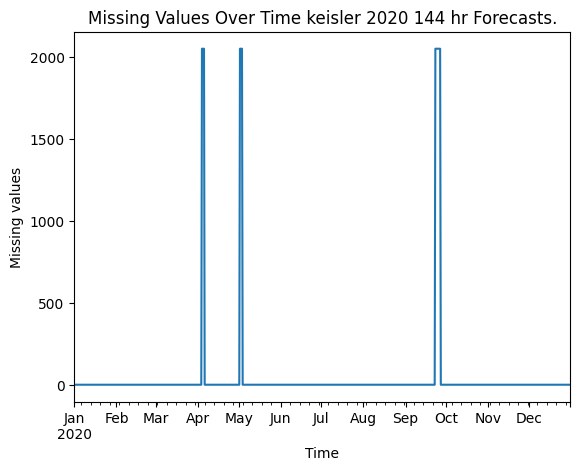

Affected Time Steps
 <DatetimeArray>
['2020-04-04 00:00:00', '2020-04-04 12:00:00', '2020-04-05 00:00:00',
 '2020-04-05 12:00:00', '2020-05-02 00:00:00', '2020-05-02 12:00:00',
 '2020-05-03 00:00:00', '2020-05-03 12:00:00', '2020-09-23 00:00:00',
 '2020-09-23 12:00:00', '2020-09-24 00:00:00', '2020-09-24 12:00:00',
 '2020-09-25 00:00:00', '2020-09-25 12:00:00', '2020-09-26 00:00:00',
 '2020-09-26 12:00:00']
Length: 16, dtype: datetime64[ns]
Lead time: 168


<ipython-input-36-93dc770bee38>:5: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(data_store)[variable]


Count of Missing Values
 time               0
longitude          0
latitude           0
keisler_168    32768
area_weight        0
dtype: int64


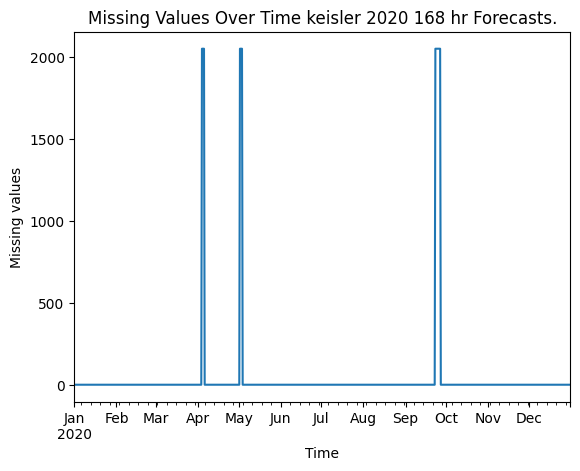

Affected Time Steps
 <DatetimeArray>
['2020-04-04 00:00:00', '2020-04-04 12:00:00', '2020-04-05 00:00:00',
 '2020-04-05 12:00:00', '2020-05-02 00:00:00', '2020-05-02 12:00:00',
 '2020-05-03 00:00:00', '2020-05-03 12:00:00', '2020-09-23 00:00:00',
 '2020-09-23 12:00:00', '2020-09-24 00:00:00', '2020-09-24 12:00:00',
 '2020-09-25 00:00:00', '2020-09-25 12:00:00', '2020-09-26 00:00:00',
 '2020-09-26 12:00:00']
Length: 16, dtype: datetime64[ns]
Lead time: 192


<ipython-input-36-93dc770bee38>:5: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(data_store)[variable]


Count of Missing Values
 time               0
longitude          0
latitude           0
keisler_192    32768
area_weight        0
dtype: int64


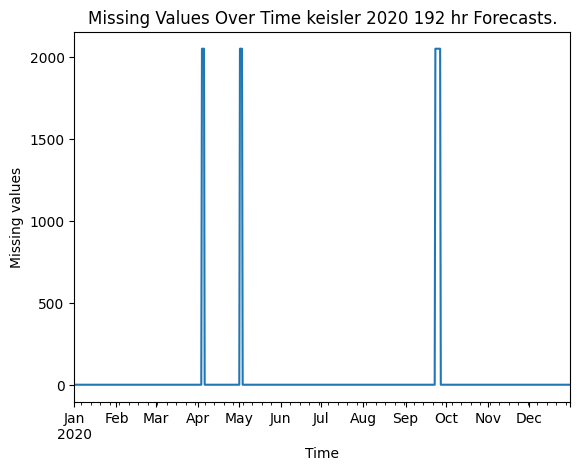

Affected Time Steps
 <DatetimeArray>
['2020-04-04 00:00:00', '2020-04-04 12:00:00', '2020-04-05 00:00:00',
 '2020-04-05 12:00:00', '2020-05-02 00:00:00', '2020-05-02 12:00:00',
 '2020-05-03 00:00:00', '2020-05-03 12:00:00', '2020-09-23 00:00:00',
 '2020-09-23 12:00:00', '2020-09-24 00:00:00', '2020-09-24 12:00:00',
 '2020-09-25 00:00:00', '2020-09-25 12:00:00', '2020-09-26 00:00:00',
 '2020-09-26 12:00:00']
Length: 16, dtype: datetime64[ns]
Lead time: 216


<ipython-input-36-93dc770bee38>:5: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(data_store)[variable]


Count of Missing Values
 time               0
longitude          0
latitude           0
keisler_216    32768
area_weight        0
dtype: int64


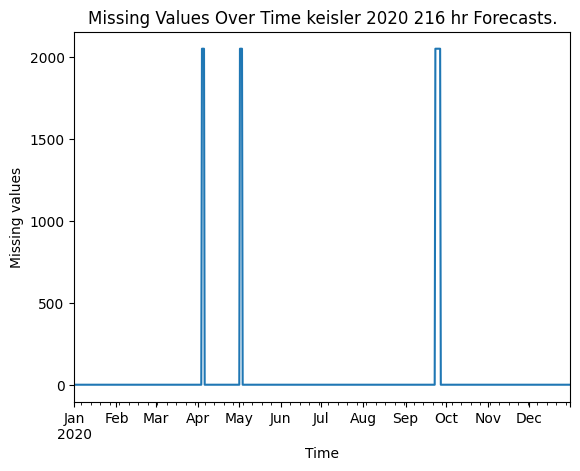

Affected Time Steps
 <DatetimeArray>
['2020-04-04 00:00:00', '2020-04-04 12:00:00', '2020-04-05 00:00:00',
 '2020-04-05 12:00:00', '2020-05-02 00:00:00', '2020-05-02 12:00:00',
 '2020-05-03 00:00:00', '2020-05-03 12:00:00', '2020-09-23 00:00:00',
 '2020-09-23 12:00:00', '2020-09-24 00:00:00', '2020-09-24 12:00:00',
 '2020-09-25 00:00:00', '2020-09-25 12:00:00', '2020-09-26 00:00:00',
 '2020-09-26 12:00:00']
Length: 16, dtype: datetime64[ns]
Lead time: 240


<ipython-input-36-93dc770bee38>:5: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(data_store)[variable]


Count of Missing Values
 time               0
longitude          0
latitude           0
keisler_240    32768
area_weight        0
dtype: int64


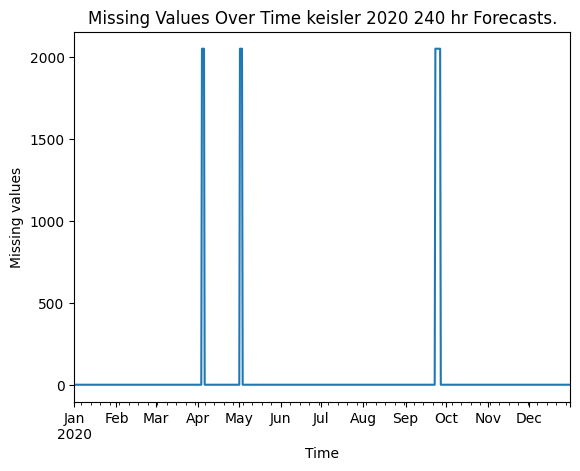

Affected Time Steps
 <DatetimeArray>
['2020-04-04 00:00:00', '2020-04-04 12:00:00', '2020-04-05 00:00:00',
 '2020-04-05 12:00:00', '2020-05-02 00:00:00', '2020-05-02 12:00:00',
 '2020-05-03 00:00:00', '2020-05-03 12:00:00', '2020-09-23 00:00:00',
 '2020-09-23 12:00:00', '2020-09-24 00:00:00', '2020-09-24 12:00:00',
 '2020-09-25 00:00:00', '2020-09-25 12:00:00', '2020-09-26 00:00:00',
 '2020-09-26 12:00:00']
Length: 16, dtype: datetime64[ns]


In [53]:
# @title Check other Leadtimes
lead_times=[72, 96, 120, 144, 168, 192, 216, 240]

for lead_time in lead_times:
  print(f"\nLead time: {lead_time}\n")
  df =  load_forecasts_per_lead_time('keisler',keisler_data_store, 500,lead_time, "geopotential")
  print("Count of Missing Values\n",df.isna().sum())
  plot_missing_values_over_time('keisler',df, lead_time)
  print("Affected Time Steps\n",df[df[f"keisler_{lead_time}"].isna()]["time"].unique())




